### Script - Microdados da Educação Superior 2020


Importando as bibliotecas a serem utilizadas neste projeto. Primeiramente, importaremos as bibliotecas **pandas**, **matplotlib** e **os**. Em seguida, faremos a leitura do dataset.


**Introdução ao Pandas:** Pandas é uma biblioteca para Ciência de Dados de código aberto (open source), construída sobre a linguagem Python, e que providencia uma abordagem rápida e flexível, com estruturas robustas para se trabalhar com dados relacionais (ou rotulados), e tudo isso de maneira simples e intuitiva.

**Introdução ao Matplotlib:** Matplotlib é uma biblioteca compreensiva para criação de visualizações estáticas, animadas, e interativas em Python. Para mais informações sobre essa tecnologia, acesse a documentação MatPlotlib.

**Introdução ao OS:** Biblioteca de comandos do sistema operacional que irá auxiliar a fazer algumas operações dentro do computador.


In [292]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [293]:
ies_df = pd.read_csv((os.getcwd() + "/arquivosExcel/CADASTRO_IES_2020.CSV"),
                     encoding='ISO-8859-1', sep=';', low_memory=False)
# os.getcwd() para pegar o caminho do diretório atual
# encoding='ISO-8859-1' para não dar erro de encoding
# sep=';' para separar por ponto e vírgula
# low_memory=False para não dar erro de memória - não é recomendado para arquivos muito grandes

ies_df.head()  # Exibindo as 5 primeiras linhas do dataframe para verificar se ocorreu tudo bem com a importação/leitura

# ies_df.columns.to_list() # Exibindo as colunas do dataframe

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,DOC_EX_60_MAIS,DOC_EX_BRANCA,DOC_EX_PRETA,DOC_EX_PARDA,DOC_EX_AMARELA,DOC_EX_INDÍGENA,DOC_EX_COR_ND,DOC_EX_BRA,DOC_EX_EST,DOC_EX_COM_DEFICIÊNCIA
0,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,2,18,1,8,0,0,27,54,0,0
1,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,3,45,5,17,2,0,0,67,2,0
2,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,9,114,2,31,2,0,3,152,0,0
3,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,1,30,1,4,0,0,4,39,0,0
4,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,0,14,0,7,0,0,18,39,0,0


Adicionando uma fonte customizada para gerar os gráficos com o objetivo de deixar mais bonito


In [294]:
from matplotlib import font_manager

diretorioFontes = os.getcwd() + "/fontesRelatorio"
arquivosFontes = font_manager.findSystemFonts(fontpaths=diretorioFontes)

for arquivo in arquivosFontes:
    font_manager.fontManager.addfont(arquivo)

Começando a fazer os gráficos, agrupando os dados de acordo com os funcionários inscritos por região, docentes de diferentes etnias, gêneros e portadores de deficiências.


Análise da Quantidade de Docentes por Região


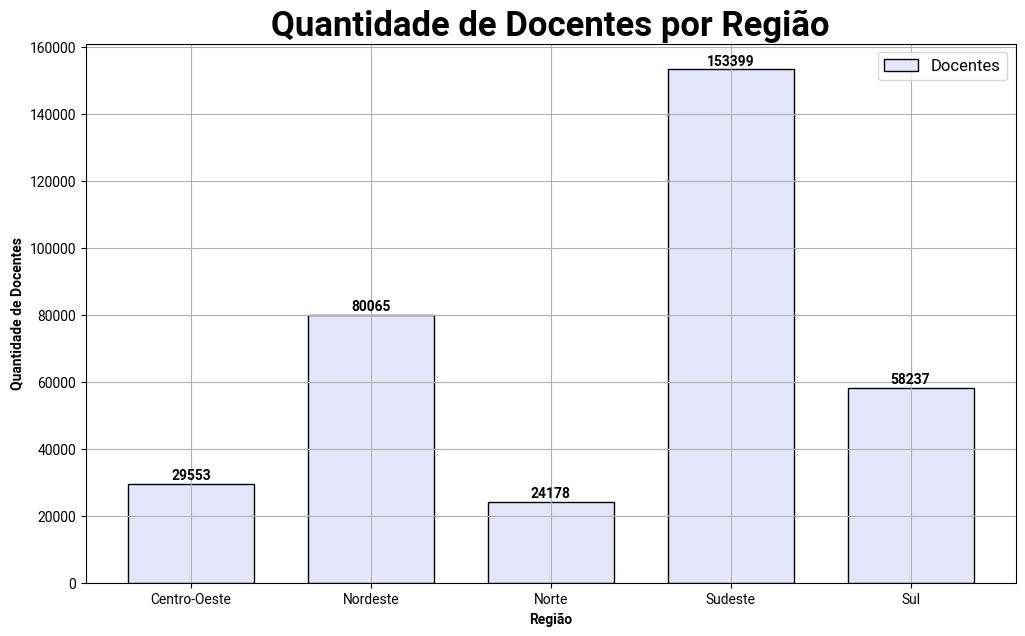

In [295]:

dataDocTotal = ies_df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()

plt.bar(dataDocTotal.index, dataDocTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocTotal.index, dataDocTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes Pretos por Região


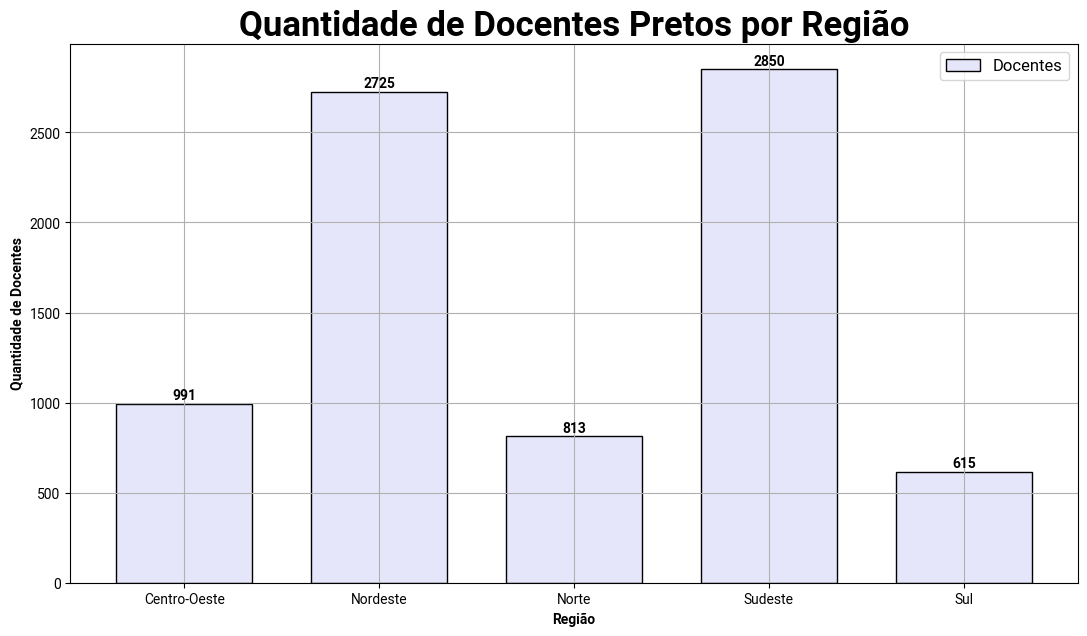

In [296]:
dataDocPretosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_PRETA'].sum()

plt.bar(dataDocPretosTotal.index, dataDocPretosTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes Pretos por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocPretosTotal.index, dataDocPretosTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesPretosPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes Brancos por Região


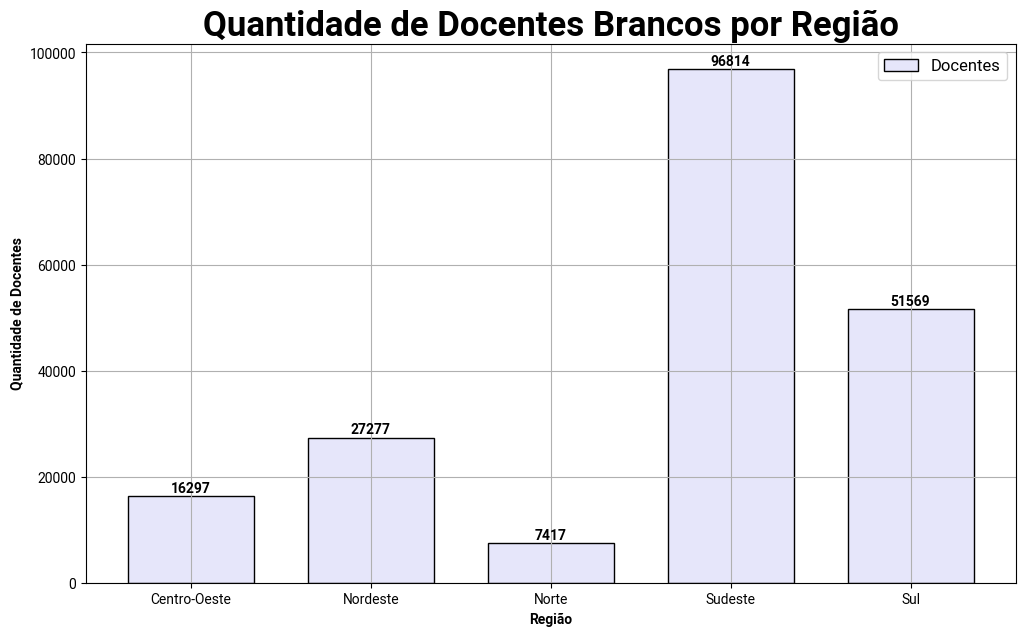

In [297]:
dataDocBrancosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_BRANCA'].sum()

plt.bar(dataDocBrancosTotal.index, dataDocBrancosTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes Brancos por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocBrancosTotal.index, dataDocBrancosTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesBrancosPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes Amarelos por Região


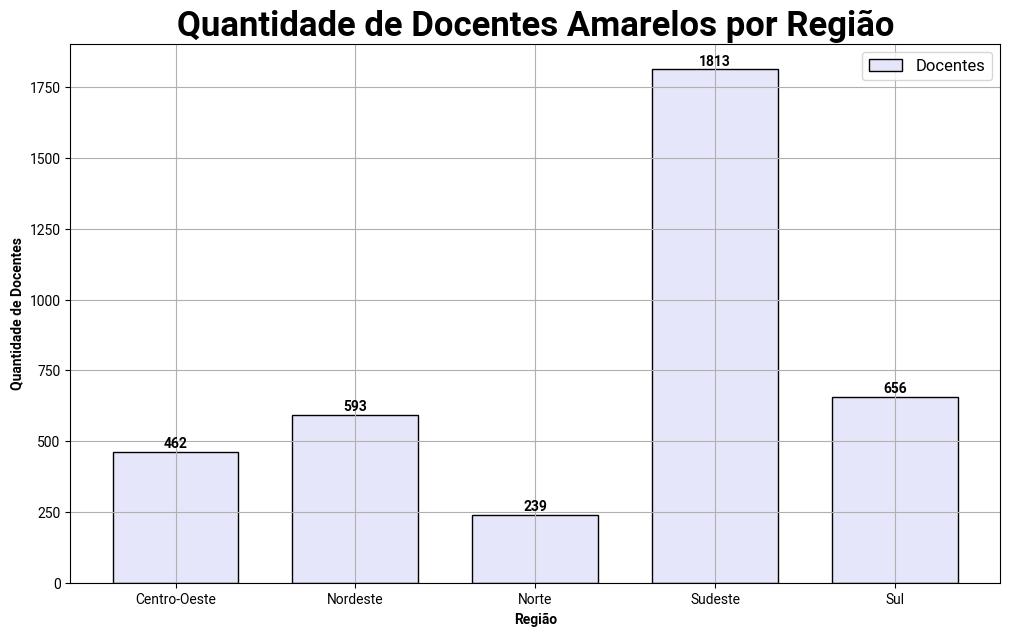

In [298]:
dataDocAmarelosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_AMARELA'].sum()

plt.bar(dataDocAmarelosTotal.index, dataDocAmarelosTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes Amarelos por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocAmarelosTotal.index, dataDocAmarelosTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesAmarelosPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes Indígenas por Região


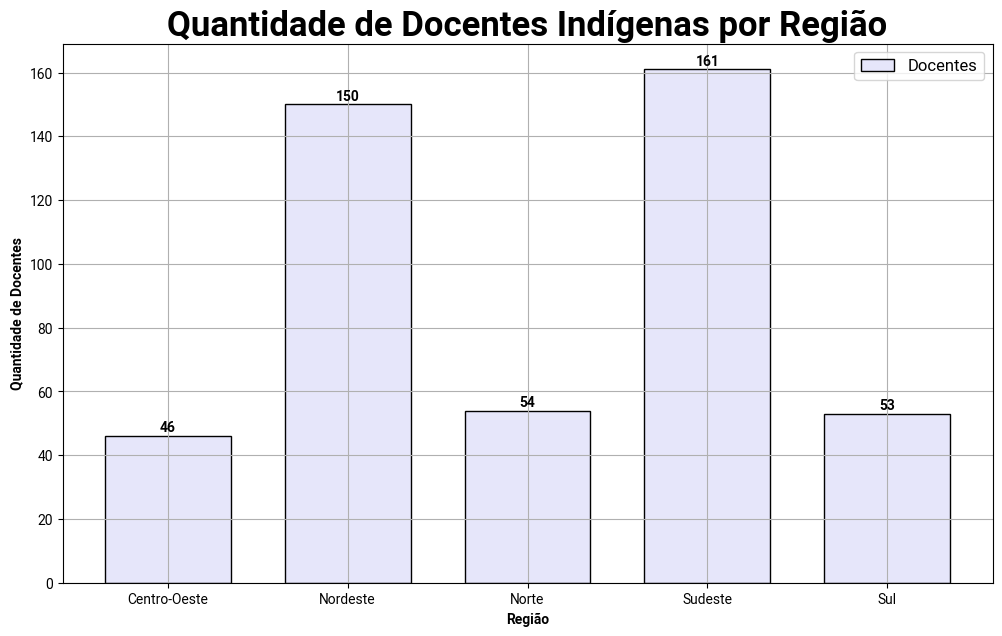

In [299]:
dataDocIndigenasTotal = ies_df.groupby(
    'NO_REGIAO_IES')['DOC_EX_INDÍGENA'].sum()

plt.bar(dataDocIndigenasTotal.index, dataDocIndigenasTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes Indígenas por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocIndigenasTotal.index, dataDocIndigenasTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesIndigenasPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes com Deficiência (PCD) por Região


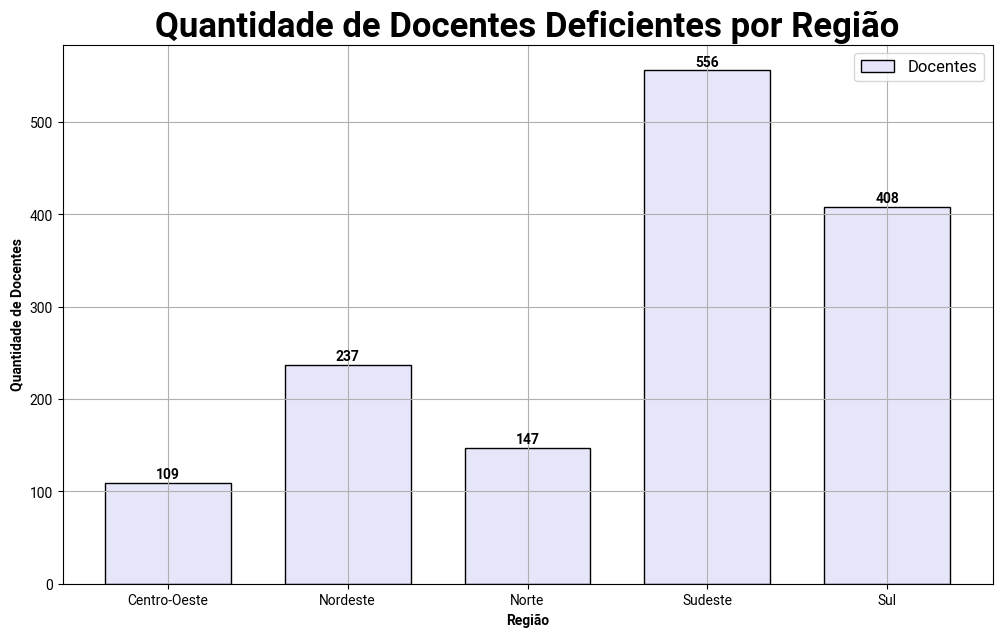

In [300]:
dataDocDeficientesTotal = ies_df.groupby(
    'NO_REGIAO_IES')['DOC_EX_COM_DEFICIÊNCIA'].sum()

plt.bar(dataDocDeficientesTotal.index, dataDocDeficientesTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes Deficientes por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocDeficientesTotal.index, dataDocDeficientesTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesDeficientesPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes Mulheres por Região


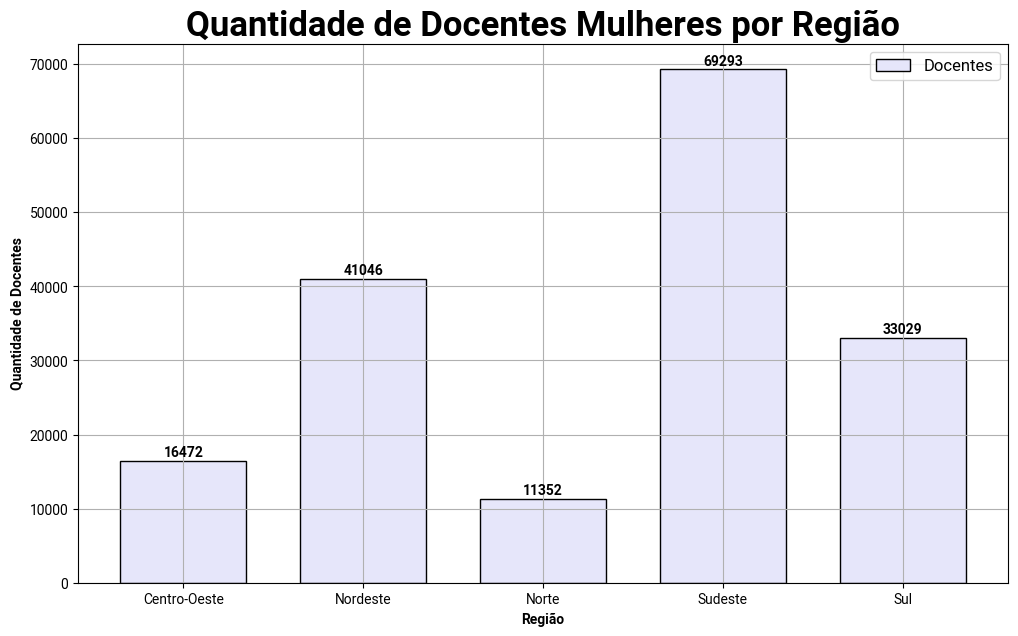

In [301]:
dataDocMulheresTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_FEMI'].sum()

plt.bar(dataDocMulheresTotal.index, dataDocMulheresTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes Mulheres por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocMulheresTotal.index, dataDocMulheresTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesMulheresPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes Homens por Região


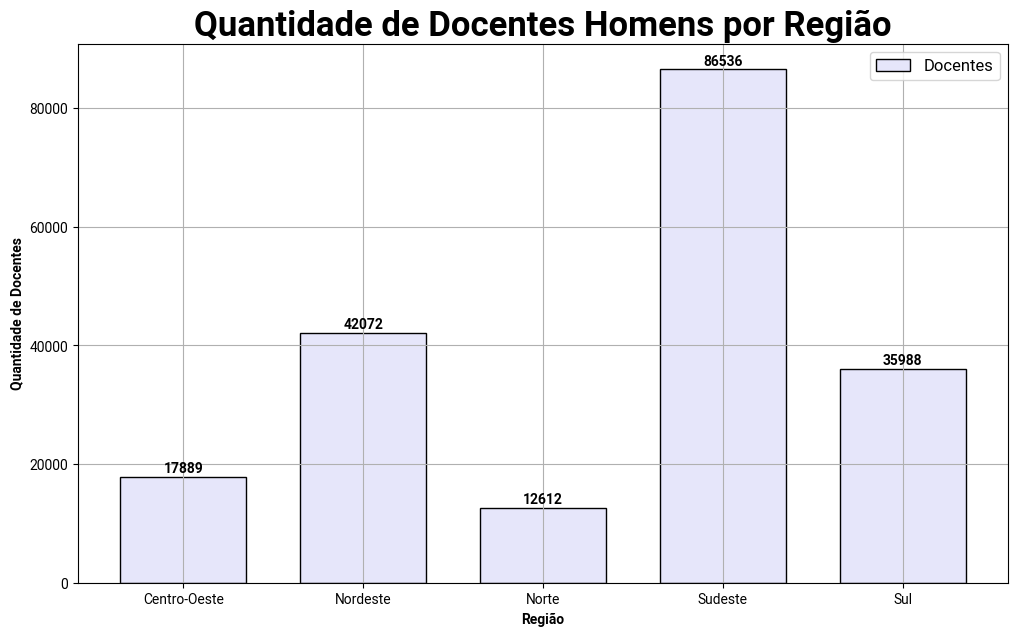

In [302]:
dataDocHomensTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_MASC'].sum()

plt.bar(dataDocHomensTotal.index, dataDocHomensTotal.values,
        color='lavender', width=0.7, edgecolor='black')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
# Alterando o tamanho da figura (largura, altura)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico
# Aumentando o tamanho do título do gráfico
plt.rcParams['axes.titlesize'] = 25

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
# Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.labelweight'] = 'bold'
# Alterando o peso da fonte do título do gráfico
plt.rcParams['axes.titleweight'] = 'bold'
# Alterando o tamanho da fonte da legendas
plt.rcParams['legend.fontsize'] = 'large'

plt.title('Quantidade de Docentes Homens por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico """

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocHomensTotal.index, dataDocHomensTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),  # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font='Roboto',
    )
# xy=(i, j) é o ponto onde será exibido o valor
# xytext=(0, 5) é o deslocamento do texto
# textcoords='offset points' é o tipo de coordenada do texto
# ha='center' é o alinhamento horizontal do texto
# va='bottom' é o alinhamento vertical do texto
# fontweight='bold' é o peso da fonte do texto
# font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesHomensPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

In [318]:
from fpdf import FPDF
import os

# Caminho para a pasta de fontes
diretorioFontes = os.path.join(os.getcwd(), 'fontesRelatorio')


class PDF(FPDF):
    def pageTitle(self, label, tamanhoFonte=16, alinhamento="C", espacamento=40):
        self.add_font('Roboto', 'B', os.path.join(
            diretorioFontes, "Roboto-Bold.ttf"), uni=True)
        self.set_font('Roboto', 'B', tamanhoFonte)
        self.cell(0, espacamento, label, align=alinhamento, ln=True)

    def pageSubTitle(self, label, tamanhoFonte=14, alinhamento="C"):
        self.add_font('Roboto', 'B', os.path.join(
            diretorioFontes, "Roboto-Bold.ttf"), uni=True)
        self.set_font('Roboto', 'B', tamanhoFonte)
        self.cell(0, 10, label, align=alinhamento, ln=True)

    def pageText(self, label, tamanhoFonte=16, alinhamento="C"):
        self.add_font('Roboto', 'R', os.path.join(
            diretorioFontes, "Roboto-Regular.ttf"), uni=True)
        self.set_font('Roboto', 'R', tamanhoFonte)
        self.multi_cell(0, 7, label, align=alinhamento)
        self.ln()

    def pageTextBold(self, label, tamanhoFonte=16, alinhamento="C"):
        self.add_font('Roboto', 'B', os.path.join(
            diretorioFontes, "Roboto-Bold.ttf"), uni=True)
        self.set_font('Roboto', 'B', tamanhoFonte)
        self.multi_cell(0, 7, label, align=alinhamento)
        self.ln()

    def pageTextMedium(self, label, tamanhoFonte=16, alinhamento="C"):
        self.add_font('Roboto', 'M', os.path.join(
            diretorioFontes, "Roboto-Medium.ttf"), uni=True)
        self.set_font('Roboto', 'M', tamanhoFonte)
        self.multi_cell(0, 7, label, align=alinhamento)
        self.ln()

    def chapterTitle(self, label):
        self.add_font('Roboto', 'B', os.path.join(
            diretorioFontes, "Roboto-Bold.ttf"), uni=True)
        self.set_font('Roboto', 'B', 17)
        self.cell(0, 10, label, 0, 1, 'L')

    def chapterText(self, text):
        self.add_font('Roboto', 'R', os.path.join(
            diretorioFontes, "Roboto-Regular.ttf"), uni=True)
        self.set_font('Roboto', 'R', 16)
        self.ln(5)
        self.multi_cell(0, 7, text)
        self.ln()

    def chapterTextBold(self, text, espacamento=7):
        self.add_font('Roboto', 'B', os.path.join(
            diretorioFontes, "Roboto-Bold.ttf"), uni=True)
        self.set_font('Roboto', 'B', 16)
        self.ln(espacamento)
        self.multi_cell(0, 7, text)

    def chapterTextMedium(self, text, espacamento=7):
        self.add_font('Roboto', 'M', os.path.join(
            diretorioFontes, "Roboto-Medium.ttf"), uni=True)
        self.set_font('Roboto', 'M', 16)
        self.ln(espacamento)
        self.multi_cell(0, 7, text)

    def tableOfContents(self, paginasArray):
        self.add_font('Roboto', 'B', os.path.join(
            diretorioFontes, "Roboto-Bold.ttf"), uni=True)
        self.set_font('Roboto', 'B', 20)
        self.cell(0, 10, 'Sumário', 0, 1, 'C')
        self.set_font('Roboto', 'R', 16)
        self.ln(20)
        for pagina, numero_pagina in paginasArray.items():
            # Calcula a largura disponível para os pontos
            largura_disponivel = self.w - \
                self.get_string_width(f"{pagina} {numero_pagina}") - 20

            # Calcula a quantidade de pontos necessários
            quantidade_pontos = int(
                largura_disponivel / self.get_string_width('.'))

            # Cria a linha do sumário com os pontos
            linha = f"{pagina} {'.' * quantidade_pontos} {numero_pagina}"
            self.cell(0, 10, linha, 0, 1, 'C')

    # Função para adicionar uma imagem centralizada ao meio da página
    def setImage(self, caminhoImagem):
        self.image(caminhoImagem, x=None, y=None, w=pdf.w - 20, h=0)

    def footer(self):
        self.set_y(-15)
        self.add_font('Roboto', 'R', os.path.join(
            diretorioFontes, "Roboto-Regular.ttf"), uni=True)
        self.set_font('Roboto', 'R', 10)
        self.cell(0, 10, 'Página ' + str(self.page_no()) +
                  ' de {nb}', align='C')


# Criando o objeto PDF
pdf = PDF()

# Criando a página
pdf.add_page()

# Definir o número total de páginas como um marcador de posição
pdf.alias_nb_pages()

# Adicionando o título da página
pdf.pageTitle("Relatório — Kick", tamanhoFonte=20)

# Pular a linha com o método ln() - 80 é o tamanho da linha
pdf.ln(80)

# Adicionando o título principal da página
pdf.pageTitle("Desigualdade na Educação do Brasil", tamanhoFonte=30)

# Adicionando o subtítulo da página
pdf.pageSubTitle("Projeto desenvolvido por: Luan Menezes de Matos Luiz", 15)

# Adicionando uma nova página
pdf.add_page()

# Adicionando o sumário da página
pdf.tableOfContents({
    '1. Introdução': '3',
    '2. Metodologia': '5',
    '3. Resultados': '7',
    '3.1. Distribuição de Docentes por Região': '7',
    '3.2. Distribuição de Docentes por Raça': '8',
    '3.3. Distribuição de Docentes por Deficiência e Gênero': '10',
    '4. Discussão': '12',
    '4.1. Desigualdade Regional': '12',
    '4.2. Desigualdade Racial': '12',
    '4.3. Desigualdade de Gênero e Deficiência': '13',
    '5. Ações para a Melhoria da Igualdade Educacional': '14',
    '5.1. Políticas Públicas e Investimentos': '14',
    '5.2. Promoção da Diversidade no Corpo Docente': '15',
    '5.3. Avaliação e Monitoramento': '15',
    '5.4. Sensibilização e Conscientização': '16',
    '5.5. Parcerias e Engajamento da Comunidade': '17',
    '5.6. Pesquisa Contínua': '18',
    '6. Considerações Finais ou Conclusão': '19'
})

# Adicionando uma nova página
pdf.add_page()

# Adicionando o título da página e colocando o link que vem do sumário (tableOfContents)
pdf.pageTitle('Introdução', tamanhoFonte=20)

# Adicionando os textos da página de introdução
pdf.pageText("A educação é um pilar fundamental para o desenvolvimento de qualquer nação e desempenha um papel crucial na formação de cidadãos capacitados e no fortalecimento da sociedade como um todo. No Brasil, a busca pela igualdade de acesso à educação de qualidade tem sido uma luta contínua, refletindo as complexidades e desafios de um país vasto e diversificado. A desigualdade na educação é uma preocupação central, abrangendo desde a distribuição de recursos educacionais até a representatividade demográfica no corpo docente.")
pdf.pageText("A Constituição Brasileira estabelece a educação como um direito fundamental de todos os cidadãos e uma responsabilidade do Estado, visando à promoção do pleno desenvolvimento da pessoa, seu preparo para o exercício da cidadania e sua qualificação para o trabalho. No entanto, apesar dos avanços nas últimas décadas, persistem desafios significativos na consecução desses objetivos, e as desigualdades socioeconômicas, raciais e de gênero continuam a moldar a experiência educacional dos brasileiros.")
pdf.pageText("Nesse contexto, uma área de particular interesse é a demografia docente, que compreende o conjunto de professores e professoras que atuam em todo o sistema educacional do país. A distribuição geográfica desses profissionais, bem como suas características raciais, de gênero e de deficiência, desempenham um papel crucial na formação dos alunos e na construção de uma sociedade mais justa e inclusiva.")
pdf.pageText("Este relatório tem como objetivo analisar a desigualdade na educação do Brasil, concentrando-se na demografia dos docentes em diferentes regiões do país e nas características que moldam esse corpo docente. Para isso, utilizaremos dados atualizados que fornecem insights valiosos sobre como a educação é estruturada no Brasil e como as desigualdades demográficas afetam o acesso à educação de qualidade. A análise abordará a distribuição de docentes por região, bem como as disparidades raciais, de gênero e de deficiência no contexto educacional brasileiro.")
pdf.pageText("Por fim, é fundamental para a compreensão das complexas questões que permeiam a educação no Brasil e para a formulação de políticas e estratégias que visem à promoção de uma educação verdadeiramente inclusiva e igualitária, capaz de atender às necessidades e aspirações de todos os brasileiros, independentemente de sua origem, raça, gênero ou capacidade. A partir da análise dos dados apresentados neste artigo, esperamos contribuir para o debate sobre a educação no Brasil e inspirar ações que possam superar as desigualdades educacionais e promover um futuro mais promissor para as gerações vindouras.")

pdf.setImage(os.path.join(
    os.getcwd(), 'imagensRelatorio', 'imagemEducacao.jpg'))

# Adicionando uma nova página
pdf.add_page()

# Adicionando o título da página
pdf.pageTitle("Metodologia", tamanhoFonte=20)

# Adicionando os textos da página
pdf.pageText("A metodologia empregada nesta análise envolveu a coleta de dados recentes, confiáveis e detalhados, provenientes de fontes governamentais e instituições educacionais brasileiras. Para compreender a demografia docente do Brasil, foram consideradas as seguintes categorias:")
pdf.pageTextMedium(
    "Docentes (Total): Representa o número total de docentes em cada uma das cinco regiões geográficas do Brasil - Centro-Oeste, Nordeste, Norte, Sudeste e Sul.")
pdf.pageTextMedium(
    "Docentes Pretos: Indica o número de docentes que se autodeclararam pretos em cada região.")
pdf.pageTextMedium(
    "Docentes Brancos: Reflete o número de docentes que se autodeclararam brancos em cada região.")
pdf.pageTextMedium(
    "Docentes Amarelos: Representa o número de docentes que se autodeclararam amarelos (ou de origem asiática) em cada região.")
pdf.pageTextMedium(
    "Docentes Indígenas: Indica o número de docentes que se autodeclararam indígenas em cada região.")
pdf.pageTextMedium(
    "Docentes com Deficiência (PCD): Reflete o número de docentes que se autodeclararam como pessoas com deficiência em cada região.")
pdf.pageTextMedium(
    "Docentes Mulheres: Representa o número de docentes do sexo feminino em cada região.")
pdf.pageTextMedium(
    "Docentes Homens: Indica o número de docentes do sexo masculino em cada região.")

# Pulando linhas
pdf.ln(30)

# Adicionando os textos da página
pdf.pageText("Os dados foram organizados em gráficos, permitindo a comparação e análise das discrepâncias nas diferentes categorias e regiões. Esses dados foram obtidos de fontes governamentais, como o INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira) e instituições educacionais respeitadas, garantindo sua confiabilidade e atualidade.")
pdf.pageText("A análise estatística incluiu a elaboração de gráficos para visualizar de maneira eficaz as desigualdades na demografia docente por região e características. Os gráficos foram elaborados utilizando a linguagem de programação Python, posteriormente, com o uso de bibliotecas famosas como o Pandas e o Matplotlib para fazer a visualização de dados, garantindo precisão e clareza na representação dos resultados.")
pdf.pageText("É importante destacar que, devido à natureza sensível das informações sobre raça, gênero e deficiência, os docentes tiveram a oportunidade de autodeclarar suas características, respeitando as diretrizes de privacidade e ética de pesquisa.")

# Adicionando uma nova página
pdf.add_page()

# Adicionando o título da página
pdf.pageTitle("Resultados", tamanhoFonte=20, espacamento=20)
pdf.pageText("A seção de resultados deste artigo apresenta as principais descobertas da análise, incluindo a distribuição de docentes por região e as desigualdades observadas nas características raciais, de gênero e de deficiência. Essas descobertas fornecem uma visão detalhada da demografia docente do Brasil e suas implicações na igualdade educacional.")

# Adicionando o subtítulo da página
pdf.chapterTitle("Distribuição de Docentes por Região")
pdf.chapterText(
    "O gráfico abaixo apresenta a distribuição de docentes por região:")

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesPorRegiao.png'))

# Adicionando uma nova página
pdf.add_page()

# Adicionando o subtítulo da página
pdf.chapterTitle("Distribuição de Docentes por Raça")
pdf.chapterText(
    "Os gráficos abaixo apresentam a distribuição de docentes por raça:")

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesPretosPorRegiao.png'))

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesBrancosPorRegiao.png'))

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesAmarelosPorRegiao.png'))

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesIndigenasPorRegiao.png'))

# Adicionando uma nova página
pdf.add_page()

# Adicionando o subtítulo da página
pdf.chapterTitle("Distribuição de Docentes por Deficiência e Gênero")
pdf.chapterText(
    "Os gráficos abaixo apresentam a distribuição de docentes por deficiência e gênero:")

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesDeficientesPorRegiao.png'))

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesMulheresPorRegiao.png'))

# Adicionando a imagem do gráfico
pdf.setImage(os.path.join(
    os.getcwd(), 'arquivosGraficos', 'docentesHomensPorRegiao.png'))

# Adicionando uma nova página
pdf.add_page()

# Adicionando o título da página
pdf.pageTitle("Discussão", tamanhoFonte=20, espacamento=20)
pdf.pageText("A discussão deste estudo se concentra nas implicações das desigualdades encontradas na demografia docente do Brasil. São exploradas questões relacionadas à representatividade, igualdade de oportunidades e os possíveis impactos dessas desigualdades na qualidade da educação e no desenvolvimento social do país.")

# Adicionando o subtítulo da página
pdf.chapterTitle("Desigualdade Regional")
pdf.chapterText("A análise da desigualdade regional na demografia docente revela que a região Sudeste concentra a maior parte dos docentes, com um contingente significativo de 153,399 profissionais. Por outro lado, as regiões Norte e Nordeste apresentam números substancialmente menores, com 24,178 e 80,065 docentes, respectivamente. Essa disparidade na distribuição de docentes entre as regiões tem implicações profundas na qualidade da educação.")
pdf.chapterText("A falta de docentes em regiões menos favorecidas pode resultar em turmas superlotadas, falta de suporte educacional adequado e limitações no acesso a recursos pedagógicos de qualidade. Isso perpetua as desigualdades educacionais, criando um ciclo que prejudica o desenvolvimento dessas regiões e de seus cidadãos. Políticas públicas que visem à distribuição mais equitativa de docentes e recursos são essenciais para combater essa desigualdade regional.")

# Adicionando o subtítulo da página
pdf.chapterTitle("Desigualdade Racial")
pdf.chapterText("A análise por raça revela desigualdades marcantes na representatividade de diferentes grupos étnicos entre os docentes. Os docentes brancos são numericamente dominantes em todas as regiões, com destaque para o Sudeste, onde representam a grande maioria. Por outro lado, a presença de docentes pretos, amarelos e indígenas é substancialmente menor em todas as regiões.")
pdf.chapterText("Essa falta de diversidade racial no corpo docente pode ter implicações significativas na experiência educacional dos alunos. A representatividade é importante, não apenas para que os alunos se identifiquem com seus professores, mas também para promover a compreensão das diversas culturas e perspectivas que compõem a sociedade brasileira. Além disso, a ausência de docentes pertencentes a grupos minoritários pode resultar em preconceitos e estereótipos prejudiciais em sala de aula. Portanto, é fundamental implementar políticas de inclusão e diversificação do corpo docente que garantam a representatividade de todas as etnias.")

pdf.chapterTitle("Desigualdade de Gênero e Deficiência")
pdf.chapterText("A análise de gênero revela uma predominância das docentes mulheres em todas as regiões do Brasil, com um número significativamente maior em comparação aos docentes homens. Embora isso possa ser interpretado como uma conquista em termos de equidade de gênero, também é importante notar que a desigualdade de gênero pode se manifestar de maneira sutil em questões como disparidade salarial e representatividade em cargos de liderança nas instituições educacionais. Portanto, é crucial monitorar e abordar questões relacionadas à igualdade de gênero no sistema educacional.")
pdf.chapterText("A representatividade de docentes com deficiência é baixa em todas as regiões do Brasil. Isso reflete a falta de oportunidades e acessibilidade para pessoas com deficiência no campo educacional. Garantir que docentes com deficiência tenham igualdade de oportunidades de emprego e que as instituições educacionais sejam acessíveis a todos os alunos e professores é uma obrigação ética e legal.")

# Adicionando uma nova página
pdf.add_page()

# Adicionando o título da página
pdf.pageTitle("Ações para a Melhoria da Igualdade Educacional",
              tamanhoFonte=20, espacamento=20)
pdf.pageText("Após a análise abrangente da desigualdade na educação no Brasil, é fundamental propor ações concretas que possam ser adotadas para enfrentar os desafios identificados e promover a igualdade educacional. Nesta seção, apresentaremos uma série de recomendações e estratégias que podem ser implementadas para melhorar a qualidade e a equidade da educação no país.")

# Adicionando o subtítulo da página
pdf.chapterTitle("1. Políticas Públicas e Investimentos")
pdf.chapterTextMedium("Políticas públicas são ações, decisões e programas formulados e implementados pelo governo em níveis federal, estadual e municipal para abordar questões específicas da sociedade. Elas representam diretrizes e estratégias destinadas a atingir objetivos sociais, econômicos e políticos, como a melhoria da educação, saúde, segurança, entre outros. No contexto da igualdade educacional, políticas públicas podem incluir medidas para alocar recursos, definir padrões de qualidade e estabelecer diretrizes para o sistema educacional.", espacamento=5)
pdf.chapterTextMedium("Investimentos referem-se à alocação de recursos financeiros, humanos e materiais em projetos, programas ou setores específicos, com o objetivo de melhorar a qualidade e a eficiência das operações e alcançar metas definidas. No contexto da educação, investimentos envolvem alocar recursos financeiros para construir e manter escolas, fornecer materiais didáticos, capacitar professores, desenvolver infraestrutura tecnológica e melhorar as condições de aprendizado. Investir na educação é fundamental para promover o acesso igualitário à educação e melhorar a qualidade do ensino.", espacamento=5)

# Pulando linhas
pdf.ln(10)

pdf.pageText("Alocação Equitativa de Recursos: Recomenda-se que o governo federal e os governos estaduais adotem políticas que garantam uma alocação mais equitativa de recursos financeiros para as escolas e sistemas educacionais em regiões menos favorecidas. Isso inclui o aumento dos investimentos em infraestrutura escolar, material didático, tecnologia educacional e capacitação de professores.")
pdf.pageText("Formação de Professores: É essencial investir na formação contínua de professores, oferecendo programas de capacitação que abordem as necessidades específicas de cada região e promovam práticas pedagógicas eficazes. Além disso, é importante diversificar o corpo docente, incentivando a formação de professores de diferentes grupos étnicos e culturas.")

# Adicionando os subtítulo da página
pdf.chapterTitle("2. Promoção da Diversidade no Corpo Docente")
pdf.chapterTextMedium("A promoção da diversidade refere-se à implementação de políticas e ações que buscam aumentar a representatividade de grupos diversos, como minorias étnicas, raciais e de gênero, em diferentes contextos, incluindo o campo educacional. Isso pode envolver a adoção de medidas afirmativas, como cotas e incentivos, para garantir que pessoas de diferentes origens tenham oportunidades iguais em posições de emprego, incluindo o cargo de professor.", espacamento=5)
pdf.chapterTextMedium("O corpo docente é composto por professores e educadores que atuam nas escolas e instituições educacionais. A promoção da diversidade no corpo docente significa garantir que os professores representem a diversidade da população, o que inclui ter docentes de diferentes grupos étnicos, raciais, de gênero e culturas, refletindo assim a pluralidade da sociedade.", espacamento=5)

# Pulando linhas
pdf.ln(10)

pdf.pageText("Políticas de Cotas e Incentivos: Propõe-se a implementação de políticas de cotas para docentes de grupos étnicos sub-representados, como pretos, amarelos e indígenas. Além disso, podem ser oferecidos incentivos financeiros e oportunidades de desenvolvimento profissional para docentes que escolham atuar em regiões com maior carência de profissionais.")
pdf.pageText("Inclusão de Docentes com Deficiência: É fundamental garantir que docentes com deficiência tenham igualdade de oportunidades de emprego e que as instituições educacionais sejam acessíveis a todos os professores, independentemente de suas capacidades.")

# Adicionando o subtítulo da página
pdf.chapterTitle("3. Avaliação e Monitoramento")
pdf.chapterTextMedium("A avaliação é o processo sistemático de coletar, analisar e interpretar dados e informações com o objetivo de avaliar o desempenho, a eficácia e a eficiência de políticas, programas e intervenções. No contexto educacional, a avaliação pode incluir a análise do progresso dos alunos, a eficácia de métodos de ensino, o cumprimento de metas educacionais e a qualidade do sistema educacional.", espacamento=5)
pdf.chapterTextMedium("O monitoramento é a prática contínua de observar e acompanhar o desenvolvimento e a implementação de políticas ou programas ao longo do tempo. Envolve a coleta regular de dados e informações para garantir que as políticas sejam implementadas conforme planejado e que os objetivos sejam alcançados. O monitoramento é fundamental para identificar problemas, ajustar estratégias e tomar decisões informadas.", espacamento=5)

# Pulando linhas
pdf.ln(10)

pdf.pageText("Mecanismos de Avaliação: Recomenda-se o desenvolvimento de mecanismos eficazes de avaliação e monitoramento das políticas educacionais. Isso inclui a definição de indicadores específicos para medir o progresso na redução das desigualdades regionais, raciais, de gênero e de deficiência.")
pdf.pageText("Pesquisas Regulares: Sugerem-se pesquisas regulares que avaliem o impacto das políticas educacionais e identifiquem áreas que necessitam de intervenção. A pesquisa educacional contínua é essencial para informar a tomada de decisões baseadas em evidências.")

# Adicionando o subtítulo da página
pdf.chapterTitle("4. Sensibilização e Conscientização")
pdf.chapterTextMedium("Sensibilização refere-se ao processo de aumentar a conscientização e o entendimento das pessoas sobre determinadas questões, problemas ou temas. No contexto educacional, a sensibilização envolve a promoção de conhecimento e empatia em relação a questões como diversidade, igualdade, inclusão e respeito. Isso pode ser feito por meio de campanhas, programas de educação, workshops e outras atividades que visam despertar a atenção das pessoas para a importância dessas questões.", espacamento=5)
pdf.chapterTextMedium("Conscientização é o estado de estar ciente e informado sobre uma questão ou problema específico. No contexto da educação, a conscientização implica que alunos, educadores, pais e a comunidade em geral compreendam os desafios enfrentados por grupos marginalizados, estejam conscientes de preconceitos e estereótipos e compreendam a importância da igualdade e inclusão.", espacamento=5)

# Pulando linhas
pdf.ln(10)

pdf.pageText("Campanhas de Sensibilização: Propõe-se a realização de campanhas de sensibilização e conscientização nas instituições educacionais para promover o respeito à diversidade, combater preconceitos e estereótipos, e criar ambientes inclusivos.")
pdf.pageText("Educação para a Diversidade: Sugere-se a inclusão de conteúdos relacionados à diversidade, igualdade e inclusão nos currículos escolares, de forma a educar os alunos sobre essas questões desde cedo. A educação para a diversidade é fundamental para formar cidadãos mais conscientes e tolerantes.")

# Adicionando o subtítulo da página
pdf.chapterTitle("5. Parcerias e Engajamento da Comunidade")
pdf.chapterTextMedium("Parcerias estratégicas são colaborações intencionais entre diferentes partes interessadas, como o governo, instituições educacionais, organizações da sociedade civil, empresas e comunidades locais, com o objetivo de alcançar metas comuns. No contexto educacional, essas parcerias podem envolver a cooperação para melhorar a qualidade da educação, fornecer recursos adicionais para escolas, compartilhar conhecimentos e experiências e envolver a comunidade na tomada de decisões relacionadas à educação.", espacamento=5)
pdf.chapterTextMedium("O engajamento da comunidade refere-se à participação ativa e envolvimento de membros da comunidade, incluindo pais, alunos, líderes locais e outros interessados, na formulação, implementação e avaliação de políticas e programas educacionais. Isso pode incluir a realização de reuniões, fóruns de discussão, comitês consultivos, voluntariado e outras formas de participação para fortalecer a relação entre a escola e a comunidade.", espacamento=5)

# Pulando linhas
pdf.ln(10)

pdf.pageText("Parcerias Estratégicas: Recomenda-se a criação de parcerias entre o sistema educacional, organizações da sociedade civil, empresas e comunidades locais. Essas parcerias podem fortalecer programas de apoio e enriquecer a experiência educacional dos alunos.")
pdf.pageText("Engajamento da Comunidade: Propõe-se a implementação de programas de engajamento da comunidade, nos quais pais, alunos e membros da sociedade participem ativamente na formulação e implementação de políticas educacionais. O envolvimento da comunidade é essencial para construir uma educação mais centrada nas necessidades locais.")

pdf.chapterTitle("6. Pesquisa Contínua")
pdf.chapterTextMedium("Pesquisas contínuas são estudos e investigações contínuos que envolvem a coleta sistemática de dados e informações ao longo do tempo para entender tendências, mudanças e desafios em uma determinada área. No contexto educacional, pesquisas contínuas podem incluir estudos sobre o desempenho dos alunos, a eficácia de programas educacionais, a análise de políticas educacionais e a avaliação de intervenções para melhorar a igualdade educacional. A pesquisa contínua é fundamental para tomar decisões baseadas em evidências e ajustar abordagens conforme necessário.", espacamento=5)

# Pulando linhas
pdf.ln(10)

pdf.pageText("Estudos e Pesquisas: Sugerem-se estudos e pesquisas contínuas para aprofundar a compreensão das desigualdades educacionais e identificar estratégias eficazes de intervenção. A pesquisa educacional desempenha um papel crucial na orientação das políticas e práticas educacionais.")
pdf.pageTextMedium("Essas ações propostas não representam uma solução única, mas sim um conjunto de estratégias que, quando implementadas em conjunto, podem contribuir significativamente para a melhoria da igualdade educacional no Brasil. É importante destacar que a concretização dessas recomendações requer uma colaboração efetiva entre o governo, as instituições educacionais, a sociedade civil e outros atores relevantes. A igualdade na educação é uma meta que vale a pena perseguir, e é responsabilidade de todos nós trabalhar juntos para alcançá-la e proporcionar oportunidades educacionais iguais para todos os brasileiros.")

# Adicionando uma nova página
pdf.add_page()

# Adicionando o título da página
pdf.pageTitle("Considerações Finais ou Conclusão",
              tamanhoFonte=20, espacamento=20)

# Adicionando os textos da página
pdf.pageText("A análise abrangente da demografia docente no Brasil revelou disparidades significativas na distribuição de docentes em diferentes regiões do país e nas características raciais, de gênero e de deficiência. Essas desigualdades levantam questões críticas sobre a igualdade de oportunidades no sistema educacional brasileiro.")
pdf.pageText("No que diz respeito à distribuição regional, a região Sudeste concentra a maior parte dos docentes, enquanto outras regiões, como o Norte e o Nordeste, enfrentam uma escassez relativa de profissionais. Essa desigualdade na alocação de docentes pode impactar negativamente a qualidade da educação oferecida em regiões menos favorecidas, perpetuando desigualdades educacionais.")
pdf.pageText("A análise por raça demonstra que os docentes brancos são numericamente dominantes em todas as regiões, enquanto a representatividade de docentes pretos, amarelos e indígenas é substancialmente menor. Essa falta de diversidade racial no corpo docente pode afetar a experiência educacional dos alunos pertencentes a grupos minoritários e aprofundar as desigualdades raciais no Brasil.")
pdf.pageText("Além disso, a análise de gênero revela que as docentes mulheres são numericamente predominantes em todas as regiões, destacando uma desigualdade de gênero que precisa ser abordada para garantir a igualdade de oportunidades e representatividade no campo educacional.")
pdf.pageText("Por fim, a representatividade de docentes com deficiência é baixa em todas as regiões, indicando a necessidade de medidas que promovam a inclusão de pessoas com deficiência no sistema educacional.")
pdf.pageTextMedium("Para superar essas desigualdades, é imperativo que o Brasil adote políticas educacionais inclusivas que promovam a equidade, diversidade e inclusão no corpo docente e garantam a distribuição justa de recursos educacionais em todo o país. Somente assim poderemos construir um sistema educacional que proporcione oportunidades iguais a todos os brasileiros, independentemente de sua origem, raça, gênero ou capacidade. A educação é a chave para o progresso, e é nossa responsabilidade assegurar que essa chave esteja ao alcance de todos os que buscam conhecimento e desenvolvimento.")

pdf.setImage(os.path.join(
    os.getcwd(), 'imagensRelatorio', 'imagemDesigualdadeSocial.jpg'))

# Salvar o PDF em um arquivo
pdf.output(os.path.join(os.getcwd(), "relatorioFinal.pdf"))

print("Relatório gerado com sucesso!")

Relatório gerado com sucesso!
